#### Dataset 3

This is a car insurance dataset, you can download from [this link](https://www.dropbox.com/s/co0q45rg78cq9oo/insurance_data.csv?dl=0). We try to train models to predict user's car insurance charges given the 6 features from the user's profile. As shown below, each row contains one user's 6 features and car insurance charges. ft1, ft2 and ft3 are numerical features, ft4 and ft5 and ft6 are categorial features.
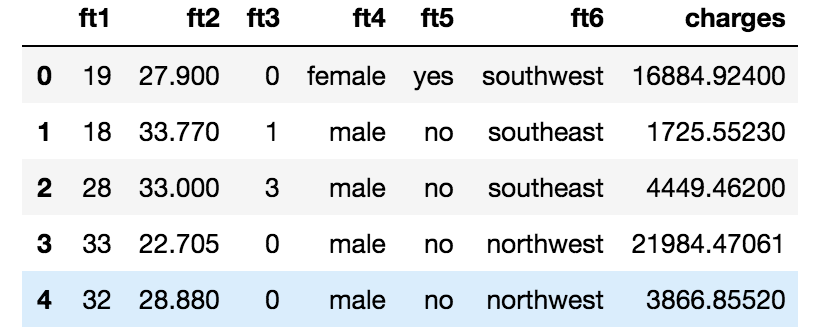

#### Feature Preprocessing
##### a) Feature Encoding: 
Use one-hot-encoding for the following 3 categorical features: ft4, ft5, ft6. Use the encoded features and the numerical features to fit a linear regression model.

In [4]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.feature_selection import f_regression, mutual_info_regression

import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('insurance_data.csv')

In [6]:
ct = ColumnTransformer([("passthrough", 'passthrough', ['ft1', 'ft2', 'ft3']), ("one_hot", OneHotEncoder(handle_unknown='ignore', dtype=np.bool_), ['ft4', 'ft5', 'ft6'])], remainder='passthrough')
out1 = ct.fit_transform(data)

In [4]:
X1 = out1[:, :-1]
y1 = out1[:, -1:]

In [183]:
def perform_cv10_regression(X, y):
    scores = cross_validate(LinearRegression(), X, y, cv=10, scoring='neg_mean_squared_error', return_train_score=True)
    avg_test_rmse = np.sqrt(-np.mean(scores['test_score']))
    avg_train_rmse = np.sqrt(-np.mean(scores['train_score']))
    return avg_test_rmse, avg_train_rmse

In [6]:
avg_test_rmse1, avg_train_rmse1 = perform_cv10_regression(X1, y1)

In [10]:
print("Average Test RMSE : {} ".format(avg_test_rmse1))
print("Average Train RMSE : {} ".format(avg_train_rmse1))

Average Test RMSE : 6081.959007332843 
Average Train RMSE : 6039.568676068135 


In [7]:
def perform_cv10_regression_predict_plot(X, y):
    predicted = cross_val_predict(LinearRegression(), X, y, cv=10)

    plt.figure(figsize=(8, 5))
    plt.scatter(y, predicted, c='orange', alpha=0.7)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
    plt.xlabel('True')
    plt.ylabel('Fitted')
    plt.title("Fitted values vs True values")
    plt.show()
    
    plt.figure(figsize=(8, 5))
    plt.scatter(predicted, predicted - y, marker='x', alpha=0.7)
    plt.plot([0, y.max()], [0, 0], 'k--', lw=2)
    plt.xlabel('Fitted')
    plt.ylabel('Residual')
    plt.title("Residual values vs Fitted values")
    plt.show()

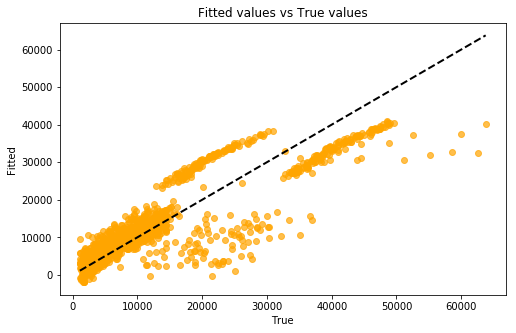

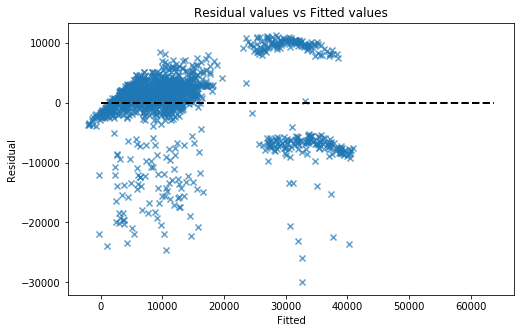

In [8]:
perform_cv10_regression_predict_plot(X1, y1)

##### (b) Standardization: 
Standardize (see the Useful Functions Section) all these numerical features and keep the one-hot-encoded features. Fit a linear regression model.

In [11]:
ct = ColumnTransformer([("scaler", StandardScaler(), ['ft1', 'ft2', 'ft3']), ("one_hot", OneHotEncoder(handle_unknown='ignore', dtype=np.bool_), ['ft4', 'ft5', 'ft6'])], remainder='passthrough')
out2 = ct.fit_transform(data)

/Users/rishabketandoshi/anaconda2/envs/python3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/rishabketandoshi/anaconda2/envs/python3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [12]:
X2 = out2[:, :-1]
y2 = out2[:, -1:]

In [13]:
avg_test_rmse2, avg_train_rmse2 = perform_cv10_regression(X2, y2)

In [14]:
print("Average Test RMSE : {} ".format(avg_test_rmse2))
print("Average Train RMSE : {} ".format(avg_train_rmse2))

Average Test RMSE : 6081.959007332843 
Average Train RMSE : 6039.568676068135 


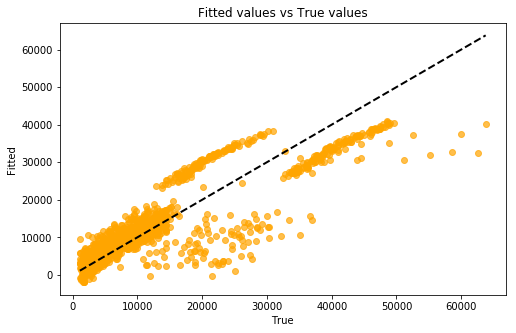

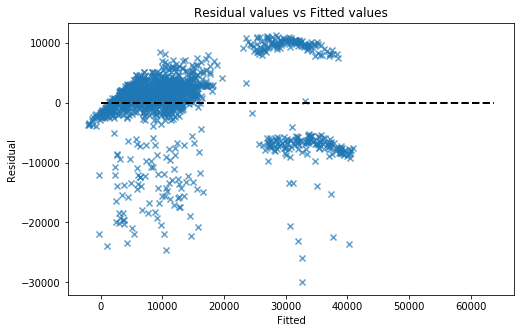

In [15]:
perform_cv10_regression_predict_plot(X2, y2)

##### (c) Divide ft1 into 3 ranges: < 30, [30, 50] and > 50. 
That is, set the new values to 1 for original values below 30, 2 for values between 30 and 50 and 3 for values above 50. Standardize ft2 and ft3 feature. One-hot encoding the rest three categorical features. Fit a linear regression model.

In [16]:
from sklearn.base import BaseEstimator, ClassifierMixin

#custom transformer for column 1 ('ft1') that buckets the values into ranges
class Ft1Transformer(BaseEstimator, ClassifierMixin):  
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, *_):
        for index, rowdata in X.iterrows():
            if rowdata[0] < 30:
                rowdata[0] = 1
            elif rowdata[0] >= 30 and rowdata[0] <= 50:
                rowdata[0] = 2
            else:
                rowdata[0] = 3
        return X

In [17]:
ct3 = ColumnTransformer([("ft1", Ft1Transformer(), ['ft1']), ("scaler", StandardScaler(), ['ft2', 'ft3']), ("one_hot", OneHotEncoder(handle_unknown='ignore', dtype=np.bool_), ['ft4', 'ft5', 'ft6'])], remainder='passthrough')
out3 = ct3.fit_transform(data)

/Users/rishabketandoshi/anaconda2/envs/python3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/rishabketandoshi/anaconda2/envs/python3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [18]:
X3 = out3[:, :-1]
y3 = out3[:, -1:]

In [19]:
avg_test_rmse3, avg_train_rmse3 = perform_cv10_regression(X3, y3)
avg_test_rmse3, avg_train_rmse3

(6240.901338063552, 6198.274818706348)

In [20]:
print("Average Test RMSE : {} ".format(avg_test_rmse3))
print("Average Train RMSE : {} ".format(avg_train_rmse3))

Average Test RMSE : 6240.901338063552 
Average Train RMSE : 6198.274818706348 


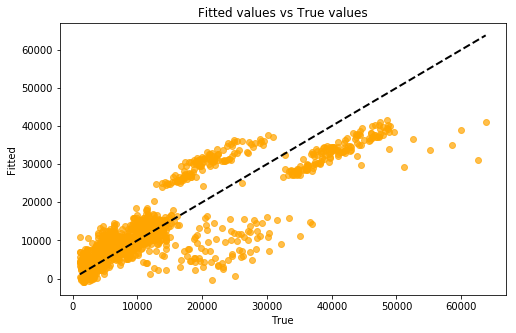

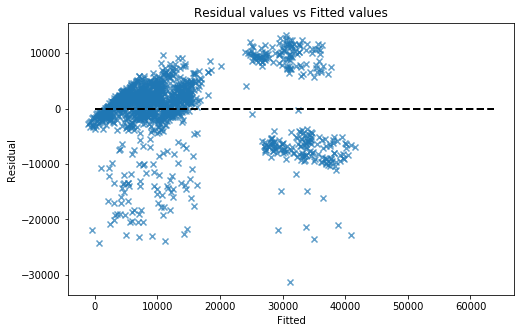

In [21]:
perform_cv10_regression_predict_plot(X3, y3)

#### Correlation exploration:
##### (a) Convert each categorical feature into a one dimensional numerical value. 
Now we have 6 numerical features. Use f regression and mutual information regression measure to select two most important variables respectively. Report the two most important variables you find.


In [9]:
from sklearn.base import BaseEstimator, ClassifierMixin

#custom transformer for column 4, 5 ('ft4', 'ft5') that converts binary categories into numeric values (-1, +1)
class Ft45Transformer(BaseEstimator, ClassifierMixin):  
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, *_):
        for index, rowdata in X.iterrows():
            for i in range(len(rowdata)):
                if rowdata[i] == 'no' or rowdata[i] == 'male':
                    rowdata[i] = -1.0
                else:
                    rowdata[i] = 1.0
        return X

In [10]:
from sklearn.base import BaseEstimator, ClassifierMixin

#custom transformer for column 6 ('ft6') that converts categories into numeric values 
class Ft6Transformer(BaseEstimator, ClassifierMixin):  
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, *_):
        for index, rowdata in X.iterrows():
            if rowdata[0] == 'southwest':
                rowdata[0] = 1.0
            elif rowdata[0] == 'southeast':
                rowdata[0] = 2.0
            else:
                rowdata[0] = 3.0
        return X

In [11]:
ct4 = ColumnTransformer([("passthrough", 'passthrough', ['ft1', 'ft2', 'ft3']), ("ft45", Ft45Transformer(), ['ft4', 'ft5']), ("ft6", Ft6Transformer(), ['ft6'])], remainder='passthrough')
out4 = ct4.fit_transform(data)

In [12]:
out4 = out4.astype(float)

In [13]:
X4 = out4[:, :-1]
y4 = out4[:, -1:]

In [14]:
f, p = f_regression(X4, np.ravel(y4))
m = mutual_info_regression(X4, np.ravel(y4))

[1.31174013e+02 5.47093081e+01 6.20603705e+00 4.39970170e+00
 2.17761487e+03 3.41647795e-02]
F-score
ft1 : 131.17401258017009
ft2 : 54.70930805463425
ft3 : 6.206037048310603
ft4 : 4.399701697437459
ft5 : 2177.614868056523
ft6 : 0.034164779479698926
M
ft1 : 1.5008841705597011
ft2 : 0.07341755120102178
ft3 : 0.1614299659571743
ft4 : 0.1766598675382165
ft5 : 0.3691710531017536
ft6 : 0.05361854026906343


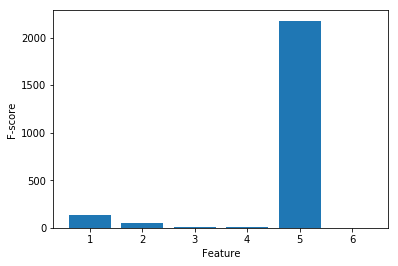

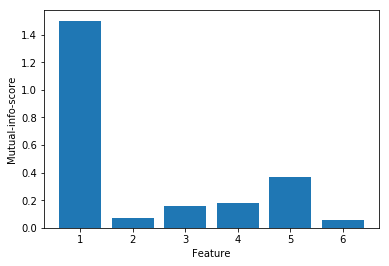

In [44]:
j = 1
print("F-score")
for i in f:
    print("ft{} : {}".format(j,i))
    j+=1

j=1
print("M")
for i in m:
    print("ft{} : {}".format(j,i))
    j+=1
    
plt.bar(range(1,7,1),f)
plt.xlabel("Feature")
plt.ylabel("F-score")
plt.show()

plt.bar(range(1,7,1),m)
plt.xlabel("Feature")
plt.ylabel("Mutual-info-score")
plt.show()

In [15]:
#return max and 2nd max of array

def top2(a):
    f1 = np.argmax(a)
    
    #mask the max value and run argmax to get the 2nd-max
    maskeda = np.ma.array(a)
    maskeda[f1] = np.ma.masked
    f2 = np.argmax(maskeda)
    
    return f1, f2

In [16]:
if1, if2 = top2(f)
im1, im2 = top2(m)

In [17]:
print("Most important features by f-score: ")
print(data.columns[if1], data.columns[if2])

print("Most important features by mutual-info-score: ")
print(data.columns[im1], data.columns[im2])

Most important features by f-score: 
ft5 ft1
Most important features by mutual-info-score: 
ft1 ft5


##### (b) Scatter plot charges (y axis) vs ft2 (x axis), and color points based on ft5 (Yes or No).

In [146]:
import matplotlib.patches as mpatches

def scatter_plot(x, y, color, xl, yl, title):
    plt.figure(figsize=(8, 5))
    plt.scatter(x, y, c=color)
    plt.xlabel(xl)
    plt.ylabel(yl)
    no = mpatches.Patch(color='purple', label='no')
    yes = mpatches.Patch(color='yellow', label='yes')
    plt.legend(handles=[yes, no])
    plt.title(title)
    
    plt.show()

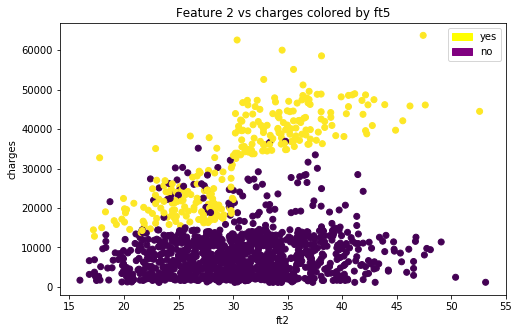

In [147]:
scatter_plot(X4[:,1], y4, X4[:,4], 'ft2', 'charges', "Feature 2 vs charges colored by ft5")

##### (c) Scatter plot charges (y axis) vs ft1 (x axis), and color points based on ft5 (Yes or No).

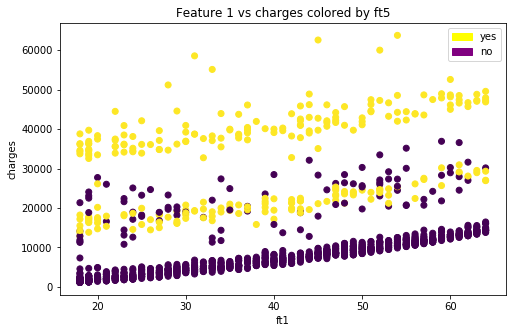

In [120]:
scatter_plot(X4[:,0], y4, X4[:,4], 'ft1', 'charges', "Feature 1 vs charges colored by ft5")

#### Modify the target variable 
As we have seen so far, the target variable: charges (y) spans a wide range, so here instead of fitting the original value, we consider fitting $log(y)$. Note here instead of calculating the difference between predicted value $(log(y)_{predict})$ and transformed target values $(log (y))$, we calculate the difference between $exp(log(y)_{predict})$ and $y$ to set up a fair comparison.

In [128]:
ct5 = ColumnTransformer([("passthrough", 'passthrough', ['ft1', 'ft2', 'ft3']), ("one_hot", OneHotEncoder(handle_unknown='ignore', dtype=np.bool_), ['ft4', 'ft5', 'ft6'])], remainder='passthrough')
out5 = ct5.fit_transform(data)

In [129]:
X5 = out5[:, :-1]
y5 = out5[:, -1:]

In [130]:
def logy(y):
    return np.log(y.astype(float))

In [131]:
from sklearn.model_selection import KFold
from sklearn.metrics import fbeta_score, make_scorer

def rmse_exp(y_true, y_pred):
    return np.sqrt(np.mean(np.square(y_true.astype(float) - np.exp(y_pred.astype(float)))))

def manual_k_fold_reg_log(X, y):
    kf = KFold(n_splits=10, shuffle=True)

    cv_train_rmse, cv_test_rmse = [], []
    
    reg = LinearRegression()

    for train_index, test_index in kf.split(X):

        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        y_train_ = logy(y_train)
        y_test_ = logy(y_test)
        reg.fit(X_train, y_train_)
        train_rmse = rmse_exp(y_train, reg.predict(X_train))
        test_rmse = rmse_exp(y_test, reg.predict(X_test))
        
        cv_train_rmse.append(train_rmse)
        cv_test_rmse.append(test_rmse)
        
    return np.mean(cv_train_rmse), np.mean(cv_test_rmse)

In [132]:
train_rmse, test_rmse = manual_k_fold_reg_log(X5.astype(float), y5)
train_rmse, test_rmse

(8363.502295115413, 8400.381184620428)

In [133]:
print("Average Test RMSE : {} ".format(train_rmse))
print("Average Train RMSE : {} ".format(test_rmse))

Average Test RMSE : 8363.502295115413 
Average Train RMSE : 8400.381184620428 


##### (a) Pick one method of feature preprocessing from question1 to train a linear regression model on this new target. 
Does the performance improve?

(Ans. - no, as some of the values are already non-linearly separable (based on the most important features. Reducing the span of the y-values will only push the values closer together; increasing the errors and decreasing performance)

In [134]:
#use standard scaler on first 3 columns
ct6 = ColumnTransformer([("scaler", StandardScaler(), ['ft1', 'ft2', 'ft3']), ("one_hot", OneHotEncoder(handle_unknown='ignore', dtype=np.bool_), ['ft4', 'ft5', 'ft6'])], remainder='passthrough')
out6 = ct6.fit_transform(data)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [135]:
X6 = out6[:, :-1]
y6 = out6[:, -1:]

In [136]:
train_rmse, test_rmse = manual_k_fold_reg_log(X6.astype(float), y6)
train_rmse, test_rmse

(8359.880134869, 8380.979982061097)

##### (b) Repeat the correlation exploration part for the new target.

In [137]:
ct7 = ColumnTransformer([("passthrough", 'passthrough', ['ft1', 'ft2', 'ft3']), ("ft45", Ft45Transformer(), ['ft4', 'ft5']), ("ft6", Ft6Transformer(), ['ft6'])], remainder='passthrough')
out7 = ct7.fit_transform(data)

In [139]:
X7 = out7[:, :-1]
y7 = out7[:, -1:]

In [140]:
f7, p7 = f_regression(X7, np.ravel(logy(y7)))
m7 = mutual_info_regression(X7, np.ravel(logy(y7)))

F-score
ft1 : 515.9770811225018
ft2 : 23.93646921637104
ft3 : 35.704670488981336
ft4 : 0.042376413664772954
ft5 : 1062.1239229249254
ft6 : 1.6438147548685562
M
ft1 : 1.497243063912438
ft2 : 0.06796579495481847
ft3 : 0.16101783950757786
ft4 : 0.1762852857174464
ft5 : 0.3693933526662416
ft6 : 0.054589488040535095


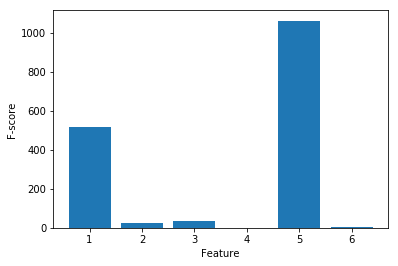

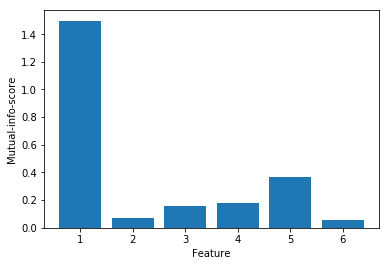

In [141]:
j = 1
print("F-score")
for i in f7:
    print("ft{} : {}".format(j,i))
    j+=1

j=1
print("M")
for i in m7:
    print("ft{} : {}".format(j,i))
    j+=1
    
plt.bar(range(1,7,1),f7)
plt.xlabel("Feature")
plt.ylabel("F-score")
plt.show()

plt.bar(range(1,7,1),m7)
plt.xlabel("Feature")
plt.ylabel("Mutual-info-score")
plt.show()

In [56]:
if1_7, if2_7 = top2(f7)
im1_7, im2_7 = top2(m7)

print("Most important features by f-score: ")
print(data.columns[if1_7], data.columns[if2_7])

print("Most important features by mutual-info-score: ")
print(data.columns[im1_7], data.columns[im2_7])

Most important features by f-score: 
ft5 ft1
Most important features by mutual-info-score: 
ft1 ft5


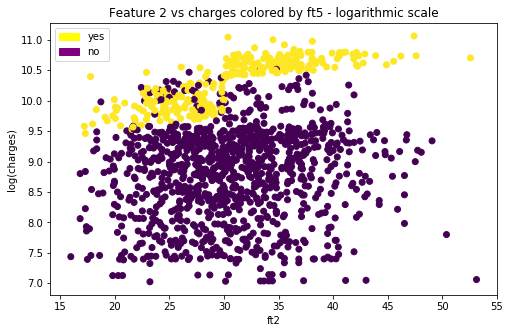

In [142]:
scatter_plot(X7[:,1], logy(y7), X7[:,4], 'ft2', 'log(charges)', "Feature 2 vs charges colored by ft5 - logarithmic scale")

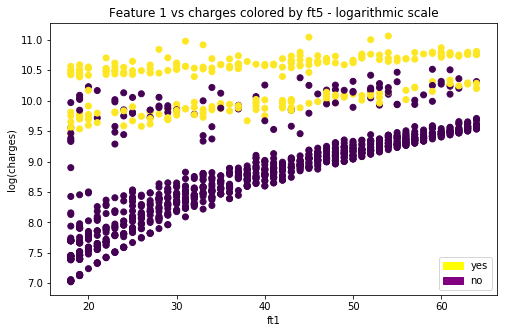

In [143]:
scatter_plot(X7[:,0], logy(y7), X7[:,4], 'ft1', 'log(charges)', "Feature 1 vs charges colored by ft5 - logarithmic scale")

#### 4. Bonus questions:

(a) Considering current results, can you further improve your results by better feature encoding? You can try polymonial features or different combinations of encoding methods.

(b) Can you further improve your results by picking a better model?

i. You should try at least three different types of models (e.g. random forest, neural network, gradient boosting tree)

ii. You can also try to modify the hyper-parameters of the models you have tried. Hint: you can use GridSearchCV as in project 1.


In [164]:
Xb = data.values[:, :-1]
yb = data.values[:, -1:].astype('float')

In [159]:
from sklearn.preprocessing import PolynomialFeatures

ctb = ColumnTransformer([("poly", PolynomialFeatures(degree=2), [0, 1, 2]), ("one_hot", OneHotEncoder(handle_unknown='ignore', dtype=np.bool_), [3, 4 ,5])], remainder='passthrough')
outb = ct.fit_transform(data)

outb[0]

array([1.9000000e+01, 2.7900000e+01, 0.0000000e+00, 1.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.6884924e+04])

In [185]:
Xb1 = outb[:, :-1]
yb1 = outb[:, -1:].astype('float')

In [188]:
avg_test_rmse_b1, avg_train_rmse_b1 = perform_cv10_regression(Xb1, yb1)
avg_test_rmse_b1, avg_train_rmse_b1

(6081.959007332844, 6039.568676068135)

In [178]:
from sklearn.metrics import mean_squared_error

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [179]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

# used to cache results
from tempfile import mkdtemp
from shutil import rmtree
from sklearn.externals.joblib import Memory

cachedir = mkdtemp()
memory = Memory(cachedir=cachedir, verbose=10)

pipeline = Pipeline([
    ('transformer', ctb),
    ('clf', LinearRegression()),
],
memory=memory
)

param_grid = [
    {
        'clf' : [LinearRegression(), GradientBoostingRegressor(), RandomForestRegressor(), MLPRegressor()]
    }
]

my_scorer = make_scorer(root_mean_squared_error, greater_is_better=False)

grid = GridSearchCV(pipeline, cv=5, n_jobs=1, param_grid=param_grid, scoring=my_scorer)
grid.fit(Xb, yb.ravel())

rmtree(cachedir)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: The 'cachedir' parameter has been deprecated in version 0.12 and will be removed in version 0.14.
You provided "cachedir='C:\\Users\\shiva\\AppData\\Local\\Temp\\tmpw1cgya7_'", use "location='C:\\Users\\shiva\\AppData\\Local\\Temp\\tmpw1cgya7_'" instead.
  app.launch_new_instance()


________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False), [0, 1, 2]), ('one_hot', OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.bool_'>, handle_unknown='ignore', n_values=None,
       sparse=True), [3, 4, 5])]), 
array([[45, ..., 'southwest'],
       ...,
       [61, ..., 'northwest']], dtype=object), 
array([ 7441.053 , ..., 29141.3603]), None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(ColumnTransformer(n_jobs=None, remainder='passthrough', spar

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\shiva\AppData\Local\Temp\tmpw1cgya7_\joblib\sklearn\pipeline\_fit_transform_one\14311f7d69182111d4c6c4eea47637ac
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\shiva\AppData\Local\Temp\tmpw1cgya7_\joblib\sklearn\pipeline\_fit_transform_one\cc2ca80676aed8d6a3c03e8531dea021
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\shiva\AppData\Local\Temp\tmpw1cgya7_\joblib\sklearn\pipeline\_fit_transform_one\3b4688b95e9e5d4522fd1e61dd00ad89
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\shiva\AppData\Local\Temp\tmpw1cgya7_\joblib\sklearn\pipeline\_fit_transform_one\755b0475eed176b222b896c661b39851
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\shiva\AppData\Local\Temp\tmpw1cgya7_\joblib\sklearn\pipeline\_fit_transform_one\1a7ca2cf83922dd1224c9352178ff56c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\shiva\AppData\Local\Temp\tmpw1cgya7_\joblib\sklearn\pipeline\_fit_transform_one\14311f7d69182111d4c6c4eea47637ac
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\shiva\AppData\Local\Temp\tmpw1cgya7_\joblib\sklearn\pipeline\_fit_transform_one\cc2ca80676aed8d6a3c03e8531dea021
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False), [0, 1, 2]), ('one_hot', OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.bool_'>, handle_unknown='ignore', n_values=None,
       sparse=True), [3, 4, 5])]), 
array([[19, ..., 'southwest'],
       ...,
       [61, ..., 'northwest']], dtype=object), 
array([16884.924 , ..., 29141.3603]), None)
____________________________________

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [180]:
pd.DataFrame(grid.cv_results_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\util

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.075248,0.006354,0.001368,0.000781,"LinearRegression(copy_X=True, fit_intercept=Tr...","{'clf': LinearRegression(copy_X=True, fit_inte...",-6052.284448,-6115.329909,-5794.213547,-6254.419799,...,-6047.567271,149.823713,3,-5974.291376,-5965.358078,-6046.015142,-5919.386574,-5979.874055,-5976.985045,40.579618
1,0.101412,0.018024,0.001757,0.000390,([DecisionTreeRegressor(criterion='friedman_ms...,{'clf': ([DecisionTreeRegressor(criterion='fri...,-4331.169170,-5148.519633,-4017.834518,-4724.381687,...,-4563.607170,379.986477,1,-3479.083165,-3256.725226,-3608.368095,-3383.006571,-3423.709705,-3430.178552,115.322394
2,0.068917,0.008112,0.002939,0.001080,"(DecisionTreeRegressor(criterion='mse', max_de...",{'clf': (DecisionTreeRegressor(criterion='mse'...,-4929.921001,-5854.005655,-4494.691502,-5266.836122,...,-5086.803819,455.373488,2,-2198.202719,-1896.730042,-2326.166712,-2134.255328,-2157.319002,-2142.534761,139.661518
3,0.602578,0.027677,0.001561,0.000478,"MLPRegressor(activation='relu', alpha=0.0001, ...","{'clf': MLPRegressor(activation='relu', alpha=...",-11706.443257,-10721.113965,-11446.233656,-11343.150076,...,-11397.835986,374.194357,4,-11297.261229,-11541.415546,-11368.363625,-11376.408651,-11279.361166,-11372.562043,92.628877


In [197]:
def perform_cv10_gb_regression(X, y):
    scores = cross_validate(GradientBoostingRegressor(), X, y, cv=10, scoring='neg_mean_squared_error', return_train_score=True)
    avg_test_rmse = np.sqrt(-np.mean(scores['test_score']))
    avg_train_rmse = np.sqrt(-np.mean(scores['train_score']))
    return avg_test_rmse, avg_train_rmse

In [198]:
avg_test_rmse_gb1, avg_train_rmse_gb1 = perform_cv10_gb_regression(Xb1, yb1)
avg_test_rmse_gb1, avg_train_rmse_gb1

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

(4562.592571047244, 3787.585013247268)